In [226]:
# repitition of abb05, bp on gains and shifts, and then do hebbian learning to transfer learning to weights
# bp first, then gradually turn on hebbian learning and narrowing
# loss up and down and up: up because hebb quickly learn pattern but gain doesn't down; down because gain and weight both down; up because narrowed gains flatten weights
# when optim sensitive to narrow rate
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_conthebb import SimpleNeuralNetwork

In [227]:
# load the pickle file
with open('weights_abb05_conthebb.pkl', 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    weight_sums = pickle.load(f)
    gain_changes = pickle.load(f)
    shift_changes = pickle.load(f)
    saved_epoch = pickle.load(f)
    all_weights = pickle.load(f)
epochs = len(losses)

In [228]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

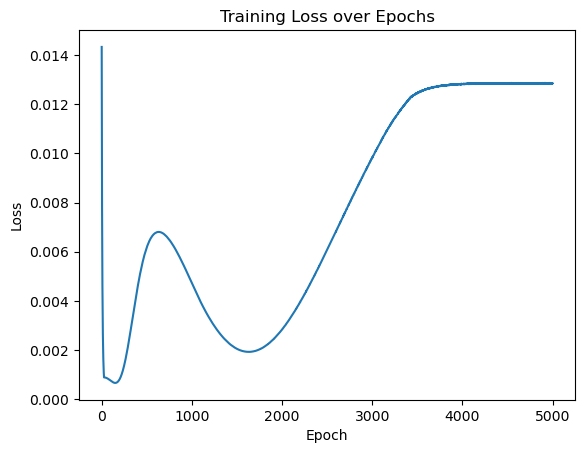

In [229]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,0.005])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

In [230]:
np.min(losses[100::])

0.0006713089240455617

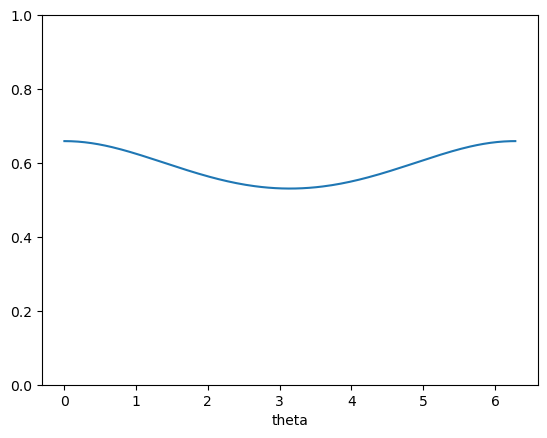

In [231]:
# Plotting the outputs
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

In [232]:
loss_func = nn.MSELoss()
epoch_losses = 0
for x, y in zip(xs, ys):
    output = model(x)
    epoch_losses += 0.5 * loss_func(output, y)
epoch_losses /= ndata
epoch_losses.item()

0.01284797303378582

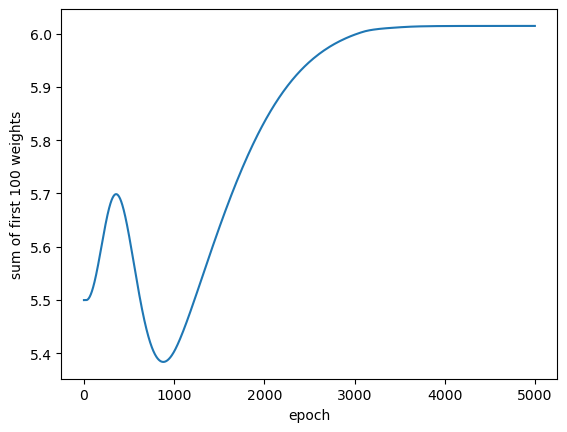

In [233]:
plt.plot(np.arange(epochs), weight_sums)
# plt.ylim([0,8])
plt.xlabel("epoch")
plt.ylabel("sum of first 100 weights")
# plt.savefig('abb05_ws.png')
plt.show()

In [234]:
rates = []
for x in xs:
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain * (input - model.shift))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.5152, 0.5148, 0.5137, ..., 0.5137, 0.5148, 0.5152],
       [0.5149, 0.5152, 0.5147, ..., 0.5121, 0.5139, 0.5149],
       [0.5141, 0.515 , 0.5152, ..., 0.51  , 0.5124, 0.5141],
       ...,
       [0.5141, 0.5124, 0.51  , ..., 0.5152, 0.515 , 0.5141],
       [0.5149, 0.5139, 0.5121, ..., 0.5147, 0.5152, 0.5149],
       [0.5152, 0.5148, 0.5137, ..., 0.5137, 0.5148, 0.5152]],
      dtype=float32)

Text(0, 0.5, 'firing rate')

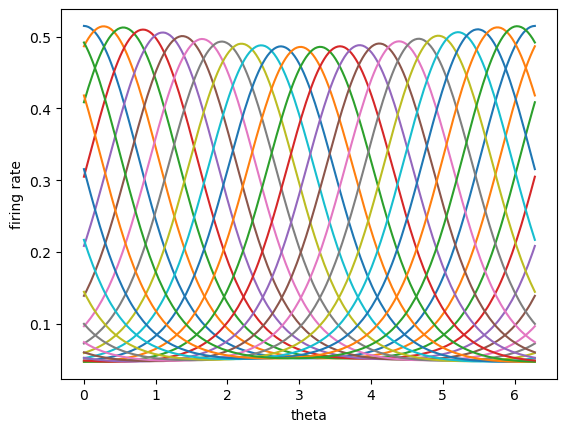

In [235]:
for i in np.arange(0,model.input_size,10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.xlabel("theta")
plt.ylabel("firing rate")
# plt.savefig('abb05_rf.png')

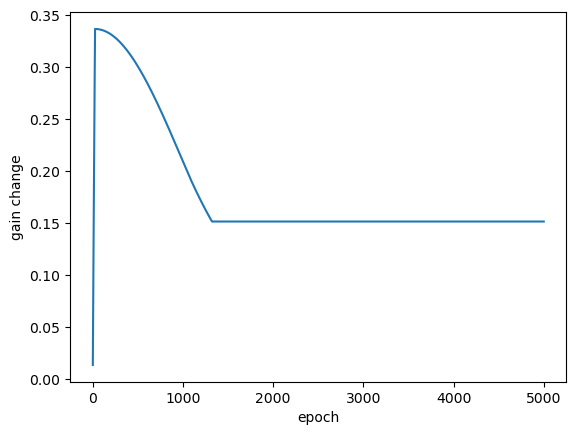

In [236]:
plt.plot(np.arange(epochs), gain_changes)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.hlines(y=np.sqrt(460)*0.1, xmin=0, xmax=epochs)
# plt.savefig('abb05_gc.png')
plt.show()

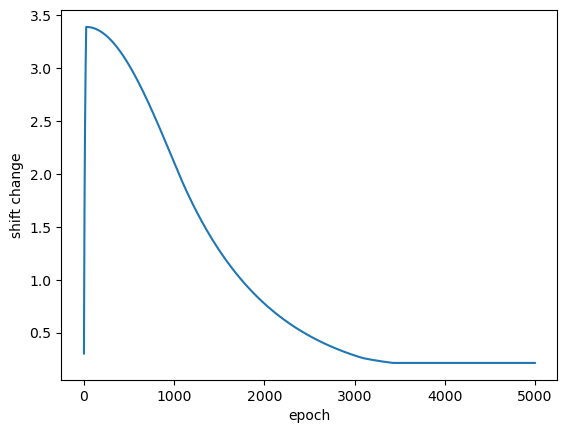

In [237]:
plt.plot(np.arange(epochs), shift_changes)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.ylim([0,0.5])
# plt.savefig('abb05_sc.png')
plt.show()

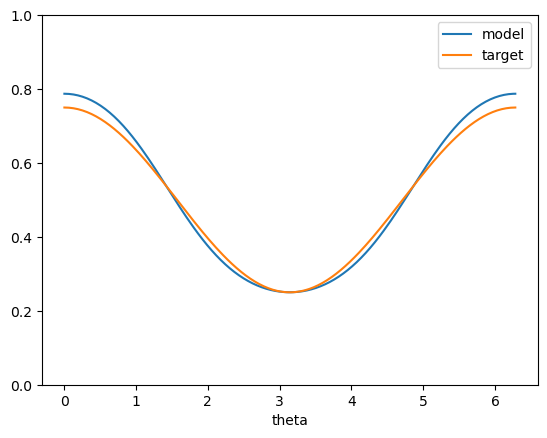

In [238]:
# Plotting the outputs
least_saved_epoch = (np.argmin(losses[100::]) + 100) // 20 * 20
least_idx = np.where(np.array(saved_epoch) == least_saved_epoch)[0].item()
# final_weights = all_weights[least_idx]
final_weights = all_weights[50]
final_model = SimpleNeuralNetwork(model.input_size, model.init_gain.detach().numpy(), model.init_shift.detach().numpy(), final_weights)
outputs = []
for x in xs:
    output = final_model(x)
    outputs.append(output.item())
plt.plot(xs, outputs, label='model')
plt.plot(xs, ys, label='target')
plt.ylim([0,1])
plt.xlabel("theta")
plt.legend()
# plt.savefig('abb05_outputs_nosup.png')

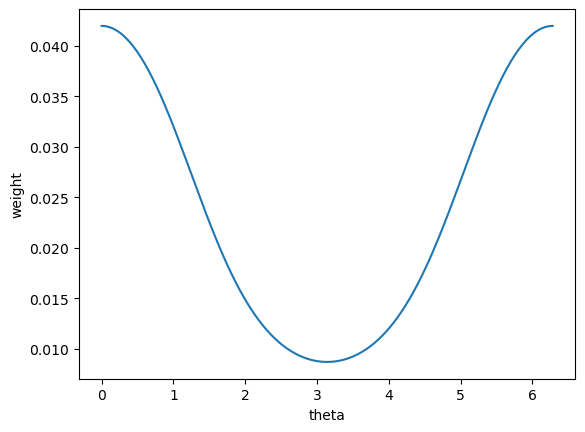

In [239]:
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), final_weights.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("weight")
# plt.savefig('abb05_ws.png')
plt.show()

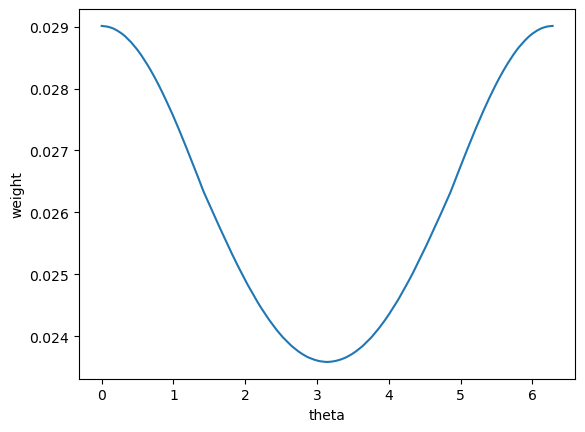

In [240]:
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), all_weights[-1].flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("weight")
# plt.savefig('abb05_ws.png')
plt.show()

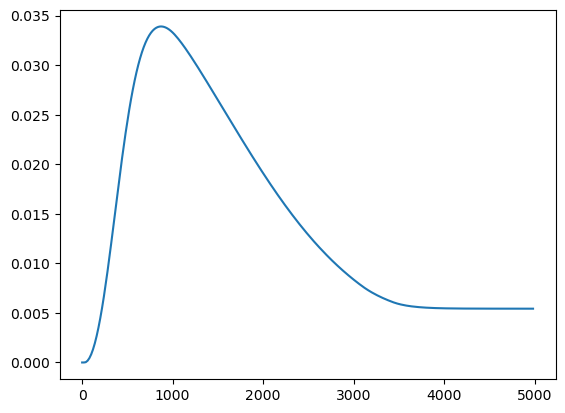

In [241]:
# plot the difference of max and min for all weights
diffs = []
for weights in all_weights:
    diffs.append(np.max(weights) - np.min(weights))
plt.plot(np.arange(0,20*len(diffs),20), diffs)

In [242]:
diffs[0:30]

[0.0,
 0.0,
 3.115274e-05,
 0.00017645955,
 0.00043999217,
 0.0008216817,
 0.0013208501,
 0.0019362215,
 0.0026662014,
 0.0035076458,
 0.0044563096,
 0.005506389,
 0.0066504106,
 0.007878806,
 0.009180557,
 0.010543007,
 0.011952141,
 0.013393082,
 0.014850859,
 0.016310126,
 0.0177565,
 0.019176625,
 0.020557836,
 0.021889815,
 0.02316356,
 0.024371453,
 0.025507912,
 0.026569255,
 0.027552886,
 0.028457455]